In [1]:
#Mean Shift Clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
x = dataset.iloc[:, [3, 4]].values

In [7]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
from sklearn.cluster import MeanShift

from packaging import version
import joblib

joblib_version = joblib.__version__

if version.parse(joblib_version) < version.parse("1.0.0"):
    print("Using old version of joblib")
else:
    print("Using newer version of joblib")
    
clustering = MeanShift(bandwidth=2).fit(X)
    
clustering.labels_

Using newer version of joblib


C:\Anaconda\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Anaconda\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Anaconda\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Anaconda\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Anaconda\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base

array([137, 136,  42,  43, 135,  43,  42, 134, 133, 132,  19, 131,  19,
        41,  19,  41, 130, 129, 128, 127, 126,  40, 125,  40, 124, 122,
        39, 123,  39, 121, 120, 119, 118, 115, 117, 116, 114, 113, 112,
       111,  38, 110,  38, 108, 109, 107, 105, 106,  37,  37, 104,  36,
       102,  36,  18, 103, 101,  18,   6,  18,  35,  35,   6,  17,   6,
        17,   6,  16,  17,  16,  34, 100,  99,  34,  14,   2,   2,  14,
         2,  33,   2,  13,  33,  15,  13,  14,  98,  32,  96,  97,  32,
         5,   1,   5,   5,  11,   1,   1,   0,   1,   0,   4,  95,  12,
        12,   0,   3,   4,  10,   4,  11,  12,  10,   4,   3,   3,  31,
        94,  31,  30,  30,  93,  92,  91,  90,  89,  27,  88,  29,  28,
        29,  28,  27,  87,   9,  86,   9,  26,  85,  26,   9,  84,  83,
        82,  81,  79,  80,  25,  22,   8,  23,   8,  22,  21,  23,   8,
        24,  21,  24,  25,  78,  77,  76,  75,  74,  20,  73,  72,  70,
        69,   7,  20,  71,  68,   7,  66,   7,  67,  65,  64,  6

In [19]:
clustering

MeanShift(bandwidth=2, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [22]:
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

n_clusters = len(np.unique(labels))
print(f"Estimated number of clusters: {n_clusters}")

Estimated number of clusters: 138


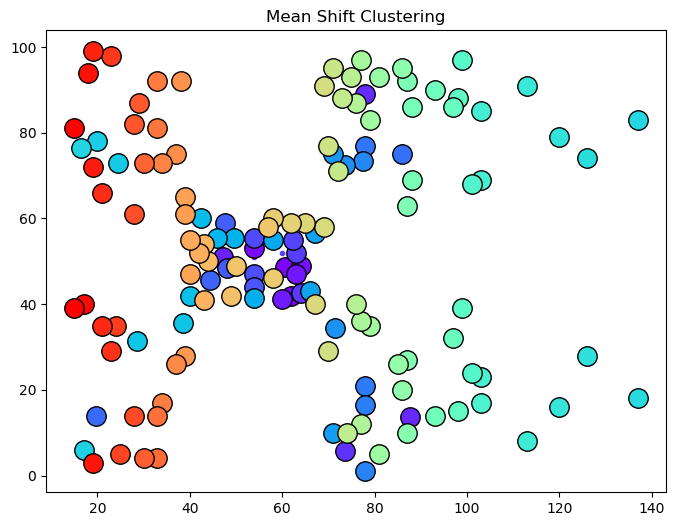

In [23]:
plt.figure(figsize=(8, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for k, col in zip(range(n_clusters), colors):
    cluster_members = (labels == k)
    plt.plot(X[cluster_members, 0], X[cluster_members, 1], '.', color=col)
    plt.plot(cluster_centers[k][0], cluster_centers[k][1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Mean Shift Clustering')
plt.show()

In [24]:
unsupervised=pd.DataFrame(dataset)

In [26]:
unsupervised['Cluster_group']=labels

In [27]:
unsupervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,137
1,2,Male,21,15,81,136
2,3,Female,20,16,6,42
3,4,Female,23,16,77,43
4,5,Female,31,17,40,135
...,...,...,...,...,...,...
195,196,Female,35,120,79,48
196,197,Female,45,126,28,47
197,198,Male,32,126,74,46
198,199,Male,32,137,18,45


C:\Anaconda\anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


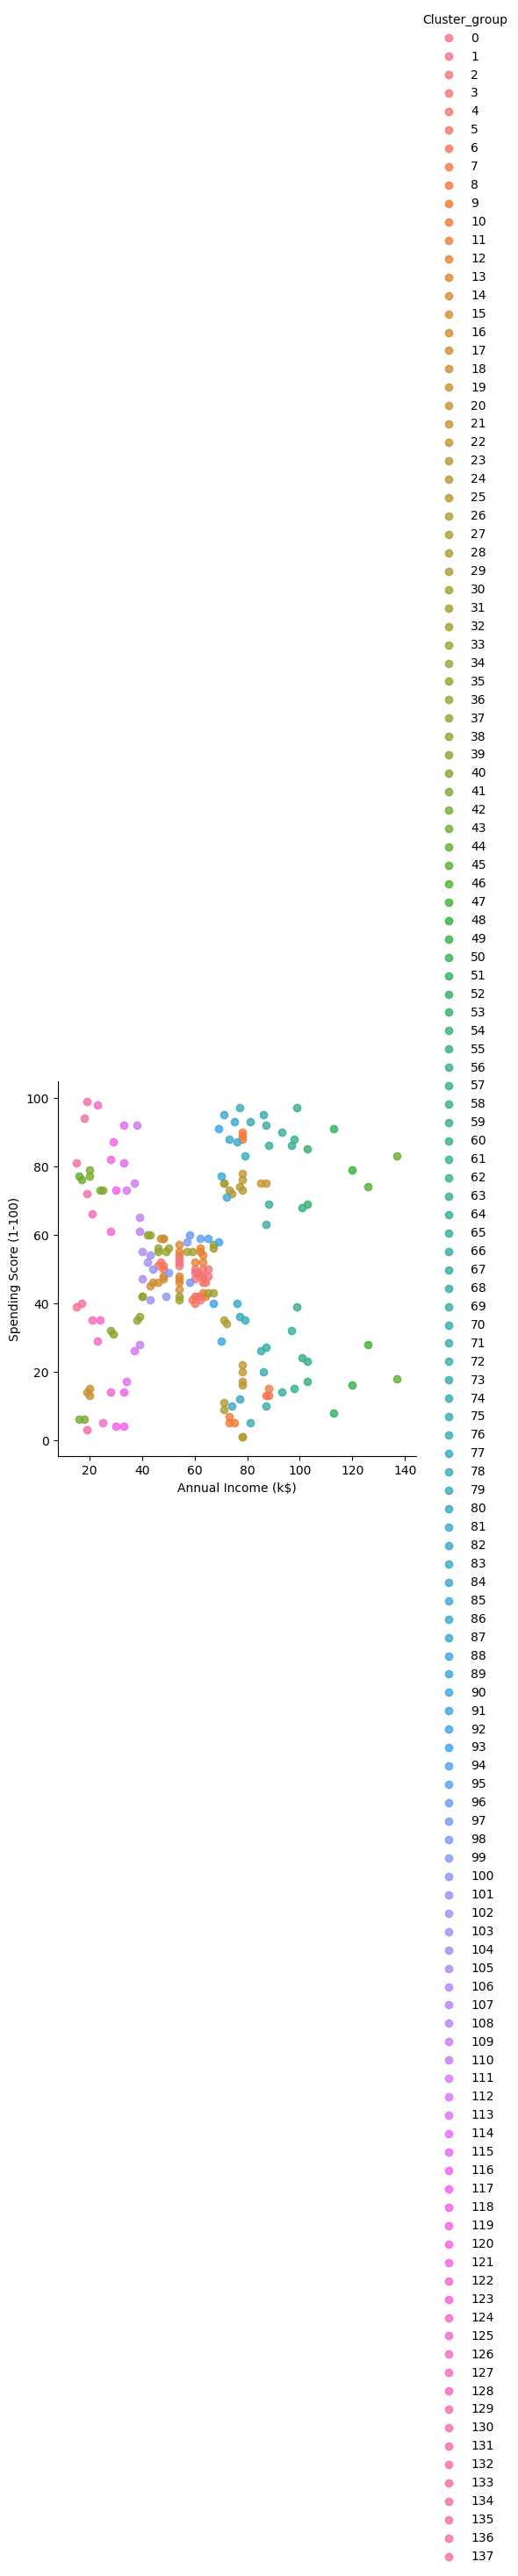

In [28]:
import seaborn as sns
facet = sns.lmplot(data=unsupervised, x=unsupervised.columns[3], y=unsupervised.columns[4], hue=unsupervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

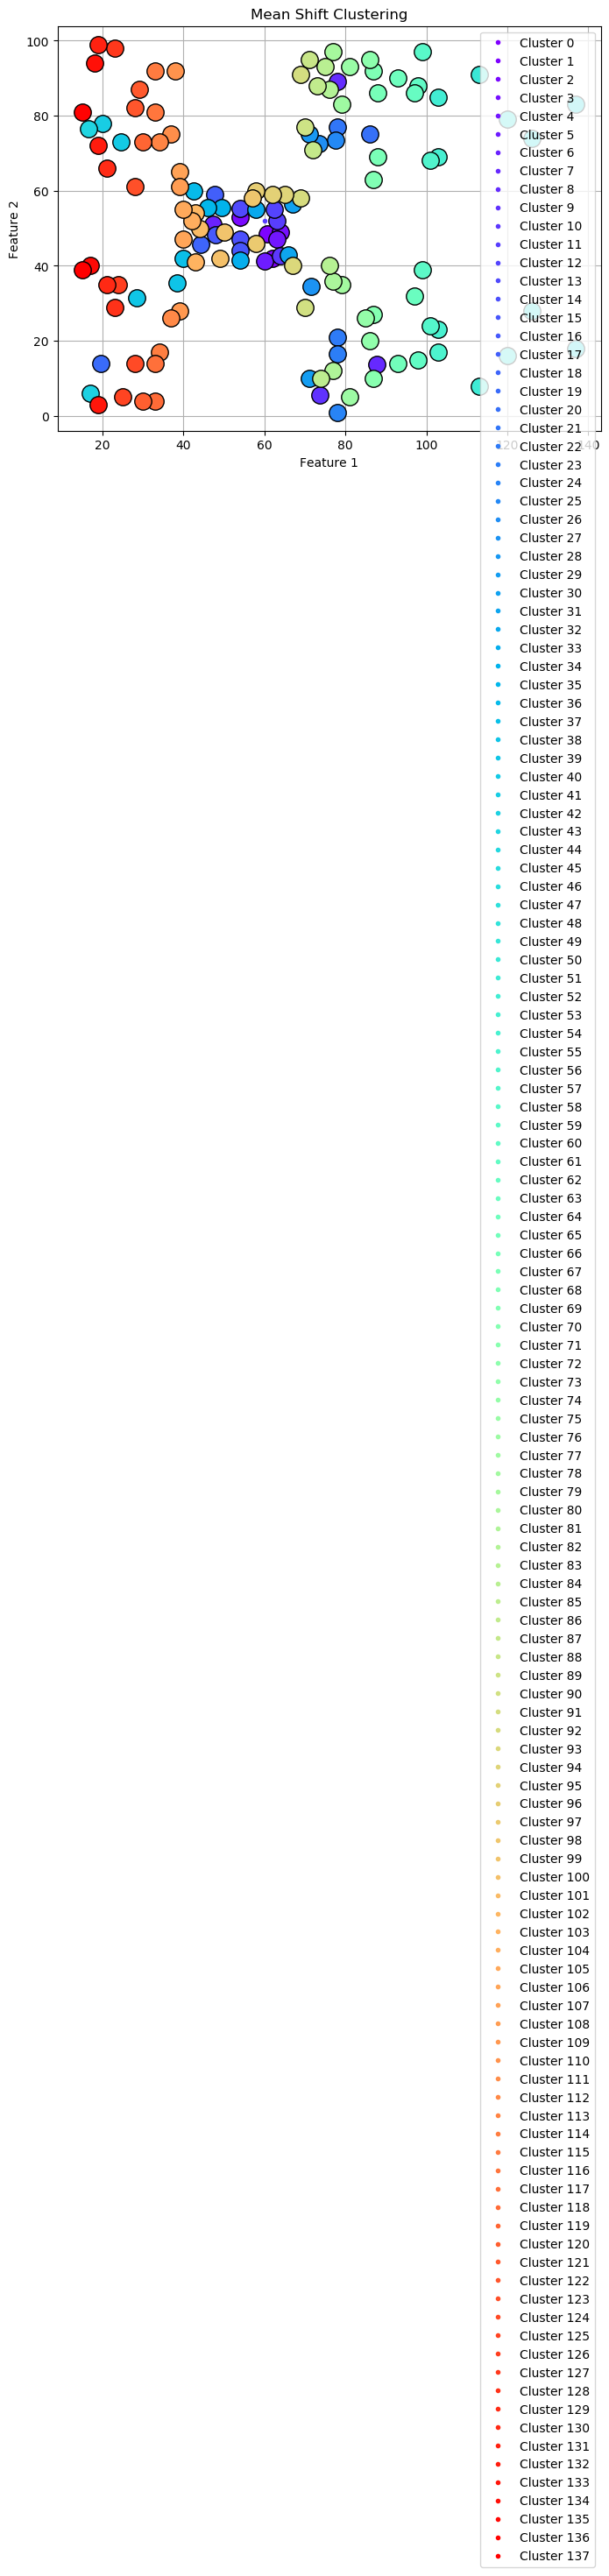

In [31]:
plt.figure(figsize=(8, 6))

colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for k, col in zip(range(n_clusters), colors):
    # Get data points for the current cluster
    members = (labels == k)
    
    # Plot cluster members
    plt.plot(X[members, 0], X[members, 1], '.', color=col, label=f'Cluster {k}')
    
    # Plot cluster center
    plt.plot(cluster_centers[k][0], cluster_centers[k][1], 'o', markerfacecolor=col,
             markeredgecolor='black', markersize=14)

# axis and labels
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()